In [220]:
import pandas as pd
from pprint import pprint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score as sklearn_r2_score
import time

### Preprocessing

In [84]:


dataset = pd.read_csv("housing.csv")
# dataset.head()
# dataset = dataset.fillna(dataset.median())
X = dataset.drop(columns=["median_house_value", 'ocean_proximity'])
y = dataset['median_house_value']



pd.get_dummies(dataset['ocean_proximity'])
X = pd.concat([X, pd.get_dummies(dataset['ocean_proximity'])], axis=1)

M, N = X.shape
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())


columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
X[columns] =  scaler.fit_transform(X[columns])
y = StandardScaler().fit_transform(dataset[['median_house_value']]).reshape((-1))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()
# X.isnull().sum()
# X.info()
print(y)

[ 2.12963148  1.31415614  1.25869341 ... -0.99274649 -1.05860847
 -1.01787803]


### Converting to normal arrays and lists

In [85]:
X_train = X_train.to_numpy().tolist()
X_test = X_test.to_numpy().tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

### Variable and function declarations

In [225]:
def predict(X, weights, bias):
    

    if not isinstance(X[0], list):
        y = 0.0
        for i in range(len(weights)):
            y += weights[i]*X[i]
        y += bias
        return y
    
    y = []

    for i in range(len(X)):
        pred = 0
        for j in range(len(weights)):
            pred += weights[j]*X[i][j]
        pred += bias
        y.append(pred)
    return y

    

def mae_cost(X, y, y_predicted):
    m = len(X)
    
    if (len(X)!=len(y)):
        raise Exception()
    
    cost = 0

    for i in range(m):
        cost += abs(y_predicted[i]- y[i])

    return cost/m
    
    
def mse_cost(X, y, y_predicted):
    m = len(X)

    cost = 0
    for i in range(m):
        cost += (y_predicted[i]-y[i])**2

    return cost/(2*m)


def r_squared(X, y, y_predicted):
    m = len(X)

    S_res = 2*m*mse_cost(X, y, y_predicted)
    average=sum(y)/m

    S_tot = sum([(y[i]-average)**2 for i in range(len(y))])

    return (1-S_res/S_tot)


W = [0 for i in range(N)] #weights
b = 0  #bias




In [226]:
def compute_gradient(X, y, weights, bias):

    m = len(X)
    n = len(weights)
    dj_dw = [0.0]*n
    dj_db = 0.0


    for i in range(m):
        error = predict(X[i], weights, bias) - y[i]
        for j in range(n):
            dj_dw[j] += error*X[i][j]
        dj_db += error
    for i in range(n):
        dj_dw[i] /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent(X, y, weights, bias, alpha=2e-1, epochs=2000):
    m = len(X)
    n = len(weights)

    weights = copy.deepcopy(weights)

    y_predicted = predict(X, weights, bias)

    mse_costs= [mse_cost(X, y, y_predicted)]
    r2_score = [r_squared(X, y, y_predicted)]
    mae_costs = [mae_cost(X, y, y_predicted)]
    

    

    time_taken = []
    start = time.time()


    for i in range(epochs):
        print(time.time()-start)

        dj_dw, dj_db = compute_gradient(X, y, weights, bias)

        for j in range(n):
            weights[j] -= alpha*dj_dw[j]
        bias -= alpha*dj_db

        

        y_predicted = predict(X, weights, bias)
        

        mse_costs.append(mse_cost(X, y, y_predicted))
        r2_score.append(r_squared(X, y, y_predicted))
        mae_costs.append(mae_cost(X, y, y_predicted))
        time_taken.append(time.time()-start)


        print(weights, bias)
    

    
    return (mse_costs, mae_costs, r2_score, time_taken), weights, bias



(mse_costs, mae_costs, r2_score, time_taken), W, b = gradient_descent(X_train, y_train, weights=W, bias=b)


    

        



0.0
[-0.009897350095778277, -0.028388003249249144, 0.02142179166361891, 0.027135278688834176, 0.01016364115949498, -0.004911219146147633, 0.013216080754590376, 0.13843479667905076, 0.02607578237572769, -0.04527104054357678, 7.494942781539619e-05, 0.010237595934886157, 0.009000820647711951] 0.00011810784256425263
0.17519235610961914
[-0.023216628853212275, -0.047992673908773306, 0.04344889039259359, 0.04164268312116712, 0.012964047245995295, -0.017107220995592625, 0.018212982896410802, 0.24651698194172358, 0.04643427823423845, -0.08333269667286511, 0.00015295708529803356, 0.019750003218744698, 0.0172516038420294] 0.0002561457074453354
0.348278284072876
[-0.03716314524157327, -0.06255786095293978, 0.06305389948270143, 0.05139942201356039, 0.015241382266308185, -0.029806642313326706, 0.022005453977455874, 0.33124876747145926, 0.06268919763954425, -0.1155944763679204, 0.00023278752471650864, 0.02830321886039896, 0.024892469526012935] 0.0005231971827520403
0.5077860355377197
[-0.05062643584

In [228]:
print(W, b)

[-0.4626200207516299, -0.4642177273455265, 0.12081668569665531, -0.11079871602931578, 0.3866506421551727, -0.36654005031853226, 0.137686099215246, 0.6462775768249187, 0.07153625355274566, -0.28264139506053815, 0.13428981915978547, 0.01957804612709337, 0.09893202431119194] 0.04169474809027842


In [190]:
print(mse_costs[-1])

0.1777272924027023


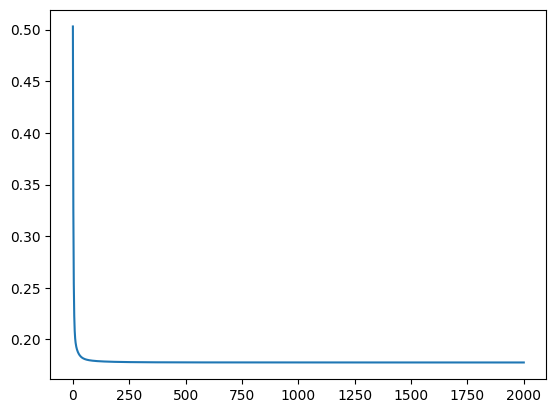

In [229]:
plt.plot(mse_costs)

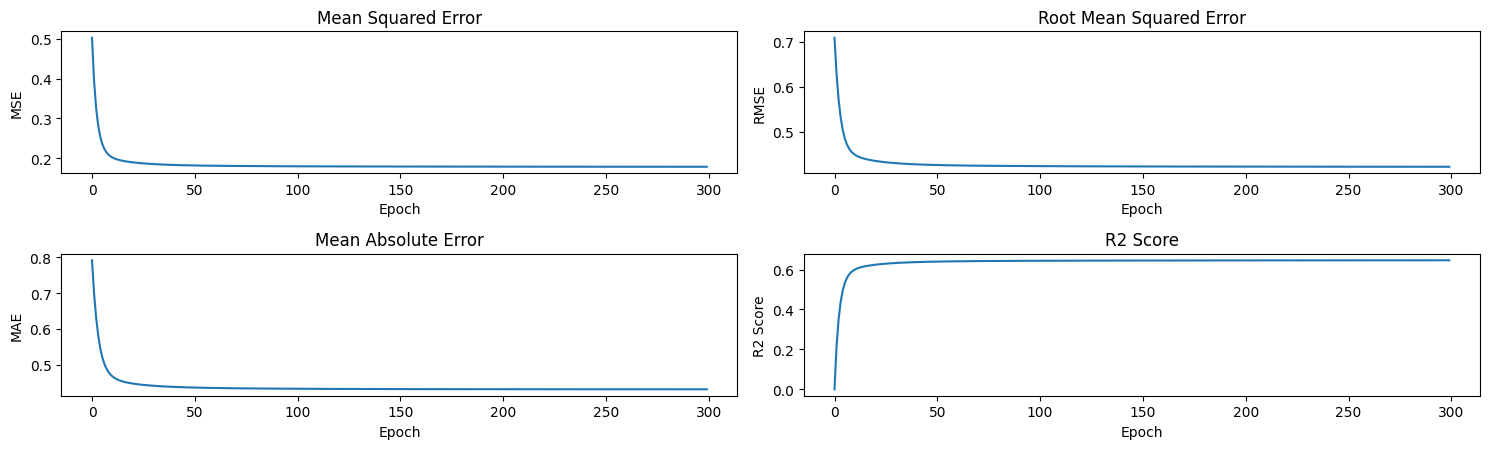

In [227]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))


axs[0, 0].plot(mse_costs[:300])
axs[0, 0].set_title("Mean Squared Error")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("MSE")


axs[0, 1].plot([i**0.5 for i in mse_costs[:300]])
axs[0, 1].set_title("Root Mean Squared Error")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("RMSE")


axs[1, 0].plot(mae_costs[:300])
axs[1, 0].set_title("Mean Absolute Error")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("MAE")


axs[1, 1].plot(r2_score[:300])
axs[1, 1].set_title("R2 Score")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("R2 Score")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [218]:
mse_costs[300]-mse_costs[299]

-1.7349912471431583e-06